In [10]:
import shap
import sklearn.neural_network
import matplotlib.pyplot as plt
import random
import torch
import numpy as np
import pandas as pd
import sys
sys.path.append("../../")
import D3QN

def load_data(filepath,count=None):
    X,Y = [],[]
    df = pd.read_csv(filepath)
    for i in range(len(df)):
        obs = df.iloc[i, 0:-1].to_dict()
        label = df.iloc[i, -1]
        X.append(list(obs.values()))
        Y.append(label)
        feature_names = list(obs.keys())
    print(feature_names)
    if count is None:
        count = len(X)
    #随机打乱
    index = [i for i in range(len(X))]
    random.shuffle(index)
    X = np.array(X)[index]
    Y = np.array(Y)[index]
    return X[:count],Y[:count],feature_names

## CACHE AGENT

In [88]:
model = torch.load('../stages/final_5/cache_agent/2/D3QN_q_eval.pth')
torch.set_grad_enabled(True)
X,Y,feature_names = load_data("./cache.csv",200)
actions = ["IDLE","L1","L2","L3"]


data = torch.tensor(X).float()
e = shap.DeepExplainer(model, data)
shap_values = e.shap_values(data)
expected_value = list(e.expected_value)
data = data.numpy()

feature_names=['es_load', 'free_storage_size_ratio_L1', 'free_storage_size_ratio_L2', 
'free_storage_size_ratio_L3', 'can_L1_fit', 'can_L2_fit', 'can_L3_fit', 'service_size', 
'', 'is_popular', 'charm', 'service_req_freq',
 'nearby_cached_server_count', '', 'es_req_freq']

['es_load', 'free_storage_size_ratio_L1', 'free_storage_size_ratio_L2', 'free_storage_size_ratio_L3', 'can_L1_fit', 'can_L2_fit', 'can_L3_fit', 'service_size', 'estimated_fetch_time', 'is_popular', 'charm', 'service_request_frequency', 'nearby_servers_count', 'cached_in_nearby_servers', 'es_request_frequency']


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


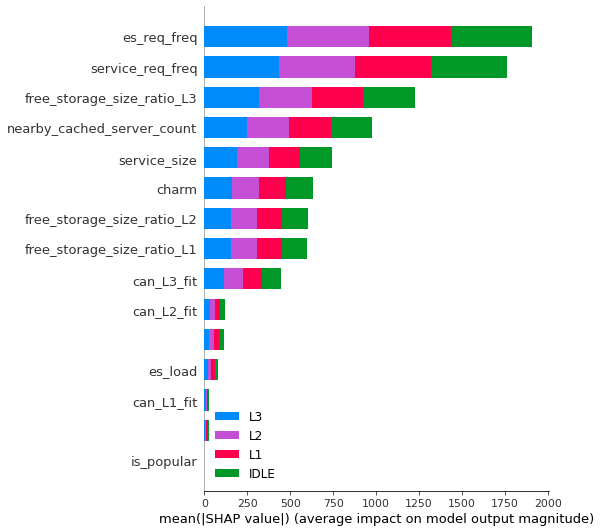

In [89]:
t = np.array(shap_values)/10
shap.summary_plot(list(t), data, feature_names,class_names=actions,show=False)
#y axis font size
#plt.yticks(fontsize=10)
plt.savefig(f'./cache_agent_temp.png',dpi = 150,bbox_inches = 'tight')

## Maintainance agent

In [90]:
model = torch.load('../stages/final_5/maintainance_agent/2/D3QN_q_eval.pth')
torch.set_grad_enabled(True)
X,Y,feature_names = load_data("./maintainance.csv",100)
print(feature_names)


data = torch.tensor(X).float()
e = shap.DeepExplainer(model, data)
shap_values = e.shap_values(data)
expected_value = list(e.expected_value)
data = data.numpy()

feature_names= ['free_space_ratio', 'service_size_ratio', 'cached_in_L1', 
'cached_in_L2', 'cached_in_L3', 'service_charm', 'service_req_freq', 
'es_req_freq', 'es_cache_miss_rate', 'least_freq_index', 'is_ugent']

['free_space_ratio', 'service_size_ratio', 'cached_in_L1', 'cached_in_L2', 'cached_in_L3', 'service_charm', 'service_request_frequency', 'es_request_frequency', 'es_cache_miss_rate', 'least_freq_index', 'is_ugent']
['free_space_ratio', 'service_size_ratio', 'cached_in_L1', 'cached_in_L2', 'cached_in_L3', 'service_charm', 'service_request_frequency', 'es_request_frequency', 'es_cache_miss_rate', 'least_freq_index', 'is_ugent']


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


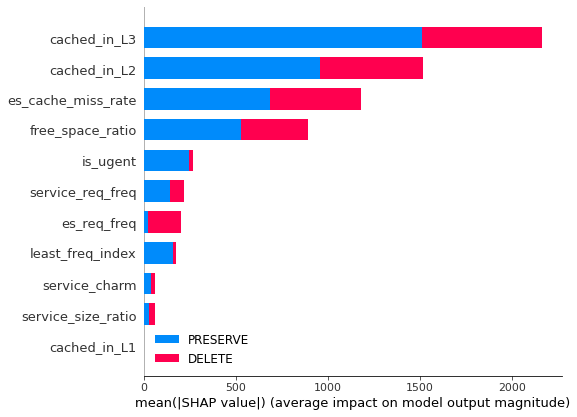

In [91]:
t = np.array(shap_values)/100
shap.summary_plot(list(t), data, feature_names,class_names=["PRESERVE","DELETE"],show=False)
#y axis font size
#plt.yticks(fontsize=10)
plt.savefig(f'./maintainance_agent_temp.png',dpi = 150,bbox_inches = 'tight')